In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [220]:
# pip install lightgbm catboost
import catboost
from catboost import CatBoostClassifier

In [117]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Importing the cleaned csv

In [119]:
df = pd.read_csv('disease_dataset_cleaned.csv')

In [120]:
X = df.drop('FinalStatus', axis=1)
y = df['FinalStatus']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42, stratify = y)

In [122]:
print(X_train.shape,X_test.shape)

(334, 19) (84, 19)


#### Training feat engg

In [123]:
num_cols = X_train.select_dtypes(np.number).columns
cat_cols = X_train.select_dtypes(include='object').columns

In [124]:
X_train_num_cols = X_train[num_cols].reset_index(drop=True)

In [125]:
X_train_cat_cols_encoded = pd.get_dummies(X_train[cat_cols])
X_train_cat_cols_encoded = X_train_cat_cols_encoded.reset_index(drop=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_train_scaled = pd.DataFrame(X_train_scaled,columns = num_cols)

In [126]:
X_train_without_scaling = pd.concat([X_train_num_cols,X_train_cat_cols_encoded],axis=1)

X_train_with_scaling = pd.concat([X_train_scaled,X_train_cat_cols_encoded],axis=1)

In [127]:
X_train_with_scaling

,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,...,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,StageofDisease_1.0,StageofDisease_2.0,StageofDisease_3.0,StageofDisease_4.0,StageofDisease_NONE,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,0.373174,-1.117645,-0.379261,-0.191749,0.583020,-0.276201,-0.287442,-0.122808,-0.229605,-1.103923,...,0,0,0,0,1,0,0,0,1,0
1,-0.721335,1.441260,-0.185462,-0.191749,-0.420736,-0.276201,-0.287442,-0.122808,-0.229605,0.057471,...,0,0,0,0,0,1,0,0,1,0
2,1.536955,0.532416,-0.663498,-0.912626,-0.280677,-1.010435,-0.646293,-1.000700,-0.425374,0.638168,...,0,0,0,1,0,0,0,0,1,0
3,-0.241044,-0.758737,-0.118710,-0.127155,-1.051002,-0.381092,0.379582,-0.602205,1.550115,-0.200617,...,0,0,0,0,1,0,0,0,1,0
4,0.298359,-0.473340,0.512212,0.704824,-1.564552,0.903817,4.981686,0.322946,0.784835,2.821158,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.338999,-0.087469,-0.446013,-0.736928,-0.397393,-0.381092,-0.404158,-0.593193,0.090744,-0.351168,...,0,0,0,0,1,0,0,0,1,0
330,0.261414,0.173508,-0.575212,-0.494052,1.189943,-1.102214,-0.312525,-0.969261,-1.101668,0.616660,...,0,0,0,1,0,0,0,0,1,0
331,-0.634513,0.114242,-0.400794,-0.191749,-0.210648,-0.276201,-0.287442,-0.122808,-0.229605,-0.039312,...,0,0,0,0,1,0,0,0,1,0
332,0.354701,-1.758897,0.294727,-0.576734,0.116157,0.248251,-0.219869,0.347376,-0.122822,0.863994,...,0,0,0,0,1,0,0,0,1,0


#### Handling Class Imbalanace

In [128]:
from imblearn.over_sampling import SMOTE

In [129]:
y_train.value_counts()

censored                      185
death                         129
censored due to transplant     20
Name: FinalStatus, dtype: int64

In [130]:
sm = SMOTE(random_state = 10)

X_res_without_scaling, y_res_without_scaling = sm.fit_resample(X_train_without_scaling, y_train)

X_res_with_scaling, y_res_with_scaling = sm.fit_resample(X_train_with_scaling, y_train)

#### Testing feat engg

In [131]:
num_cols = X_test.select_dtypes(np.number).columns
cat_cols = X_test.select_dtypes(include='object').columns

In [132]:
X_test_num_cols = X_test[num_cols].reset_index(drop=True)

In [133]:
X_test_cat_cols_encoded = pd.get_dummies(X_test[cat_cols])
X_test_cat_cols_encoded = X_test_cat_cols_encoded.reset_index(drop=True)

X_test_scaled = scaler.transform(X_test[num_cols])
X_test_scaled = pd.DataFrame(X_test_scaled,columns = num_cols)

In [134]:
X_test_without_scaling = pd.concat([X_test_num_cols,X_test_cat_cols_encoded],axis=1)

X_test_with_scaling = pd.concat([X_test_scaled,X_test_cat_cols_encoded],axis=1)

In [135]:
X_test_with_scaling

,FollowupDays,Age,BilirubinLevel,LipidProfile1,ProteinLevel,CuLevel,AlkalinePhosphateLevel,SGOTLevel,LipidProfile2,PlateletsCount,...,FluidAccumulationSwelling_present,FluidAccumulationSwelling_present or resolved,StageofDisease_1.0,StageofDisease_2.0,StageofDisease_3.0,StageofDisease_4.0,StageofDisease_NONE,DiureticTherapy_done,DiureticTherapy_no,DiureticTherapy_not required or resolved
0,-1.678222,-0.454008,-0.054110,-0.191749,0.139500,-0.276201,-0.287442,-0.122808,-0.229605,-1.136184,...,0,1,0,0,0,1,0,0,0,1
1,-0.131131,1.758198,-0.532146,0.301754,-0.187305,-0.800654,0.023290,-0.843905,1.817073,-0.146848,...,0,0,0,0,1,0,0,0,1,0
2,1.068672,0.489683,-0.553679,-0.437209,-0.374050,-0.892433,-0.094450,-0.091570,-0.905899,-0.469458,...,0,0,0,1,0,0,0,0,1,0
3,-1.218251,-0.429335,0.249507,0.131224,-0.304020,1.782275,0.250580,0.942917,0.250919,-0.103834,...,0,0,0,0,1,0,0,0,1,0
4,1.915646,-0.852852,-0.596745,-0.191749,1.003198,-0.997323,0.002813,-1.000700,-0.229605,2.358751,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-1.523051,0.490192,3.055276,0.250078,-1.331121,6.213898,2.172714,2.149217,1.247562,-0.383429,...,1,0,0,0,0,1,0,1,0,0
80,-1.052920,1.251504,-0.336194,-0.191749,-0.840914,-0.276201,-0.287442,-0.122808,-0.229605,-0.706038,...,0,0,0,0,0,1,0,0,1,0
81,0.474774,-0.606118,-0.400794,-0.282182,1.866895,-0.577761,-0.432825,0.096665,-1.137262,0.907009,...,0,0,0,1,0,0,0,0,1,0
82,0.997552,-0.264761,-0.618278,-0.191749,0.606364,-0.276201,-0.287442,-0.122808,-0.229605,1.455445,...,0,0,0,1,0,0,0,0,1,0


In [136]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    train_pred = model.predict(X_train_without_scaling)

    return(classification_report(y_train, train_pred))

In [137]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    test_pred = model.predict(X_test_without_scaling)
    
    return(classification_report(y_test, test_pred))

#### Decision Tree

In [138]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

decision_tree = decision_tree_classification.fit(X_train_without_scaling, y_train)

In [139]:
test_report = get_test_report(decision_tree)
print(test_report)

                            precision    recall  f1-score   support

                  censored       0.73      0.79      0.76        47
censored due to transplant       0.20      0.20      0.20         5
                     death       0.68      0.59      0.63        32

                  accuracy                           0.68        84
                 macro avg       0.53      0.53      0.53        84
              weighted avg       0.68      0.68      0.68        84



#### Random Forest

In [140]:
rf = RandomForestClassifier(random_state = 10)
rf = rf.fit(X_train_without_scaling, y_train)

In [141]:
test_report = get_test_report(rf)
print(test_report)

                            precision    recall  f1-score   support

                  censored       0.78      0.89      0.83        47
censored due to transplant       0.00      0.00      0.00         5
                     death       0.73      0.69      0.71        32

                  accuracy                           0.76        84
                 macro avg       0.50      0.53      0.51        84
              weighted avg       0.71      0.76      0.74        84



#### XGBoost

In [142]:
from xgboost import XGBClassifier

In [186]:
xgb_model = XGBClassifier(objective='multi:softprob', num_class=3, random_state=10)

# fit the model using fit() on train data
xg = xgb_model.fit(X_train_without_scaling, y_train)

[14:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [187]:
test_report = get_test_report(xg)
print(test_report)

                            precision    recall  f1-score   support

                  censored       0.80      0.87      0.84        47
censored due to transplant       0.25      0.20      0.22         5
                     death       0.76      0.69      0.72        32

                  accuracy                           0.76        84
                 macro avg       0.60      0.59      0.59        84
              weighted avg       0.75      0.76      0.76        84



#### CatBoost

In [221]:
cat = CatBoostClassifier(loss_function='MultiClass')

In [224]:
cat = cat.fit(X_train_without_scaling, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.074823
0:	learn: 1.0530182	total: 23.5ms	remaining: 23.5s
1:	learn: 1.0119996	total: 38.3ms	remaining: 19.1s
2:	learn: 0.9657043	total: 52.8ms	remaining: 17.6s
3:	learn: 0.9309173	total: 67.1ms	remaining: 16.7s
4:	learn: 0.9007521	total: 79.4ms	remaining: 15.8s
5:	learn: 0.8734071	total: 91.1ms	remaining: 15.1s
6:	learn: 0.8507360	total: 103ms	remaining: 14.6s
7:	learn: 0.8308100	total: 120ms	remaining: 14.8s
8:	learn: 0.8075903	total: 137ms	remaining: 15.1s
9:	learn: 0.7889991	total: 152ms	remaining: 15s
10:	learn: 0.7687009	total: 166ms	remaining: 15s
11:	learn: 0.7510155	total: 183ms	remaining: 15.1s
12:	learn: 0.7333352	total: 199ms	remaining: 15.1s
13:	learn: 0.7197806	total: 214ms	remaining: 15.1s
14:	learn: 0.7086952	total: 228ms	remaining: 15s
15:	learn: 0.6946028	total: 240ms	remaining: 14.7s
16:	learn: 0.6823899	total: 252ms	remaining: 14.6s
17:	learn: 0.6710091	total: 264ms	remaining: 14.4s
18:	learn: 0.6621498	total: 276ms	remaining: 14.2s
19:	learn: 

168:	learn: 0.2186012	total: 2.59s	remaining: 12.7s
169:	learn: 0.2176757	total: 2.61s	remaining: 12.7s
170:	learn: 0.2162914	total: 2.63s	remaining: 12.7s
171:	learn: 0.2152493	total: 2.64s	remaining: 12.7s
172:	learn: 0.2142537	total: 2.66s	remaining: 12.7s
173:	learn: 0.2129330	total: 2.67s	remaining: 12.7s
174:	learn: 0.2122044	total: 2.68s	remaining: 12.6s
175:	learn: 0.2112780	total: 2.7s	remaining: 12.6s
176:	learn: 0.2098065	total: 2.71s	remaining: 12.6s
177:	learn: 0.2088198	total: 2.72s	remaining: 12.6s
178:	learn: 0.2073972	total: 2.74s	remaining: 12.6s
179:	learn: 0.2066260	total: 2.75s	remaining: 12.5s
180:	learn: 0.2057316	total: 2.76s	remaining: 12.5s
181:	learn: 0.2042634	total: 2.78s	remaining: 12.5s
182:	learn: 0.2035751	total: 2.79s	remaining: 12.5s
183:	learn: 0.2023233	total: 2.82s	remaining: 12.5s
184:	learn: 0.2014973	total: 2.83s	remaining: 12.5s
185:	learn: 0.2006669	total: 2.85s	remaining: 12.5s
186:	learn: 0.1994139	total: 2.86s	remaining: 12.4s
187:	learn: 0

340:	learn: 0.1042731	total: 5.19s	remaining: 10s
341:	learn: 0.1038787	total: 5.2s	remaining: 10s
342:	learn: 0.1036927	total: 5.22s	remaining: 10s
343:	learn: 0.1033639	total: 5.24s	remaining: 9.99s
344:	learn: 0.1030436	total: 5.25s	remaining: 9.97s
345:	learn: 0.1028082	total: 5.27s	remaining: 9.96s
346:	learn: 0.1026464	total: 5.28s	remaining: 9.94s
347:	learn: 0.1023333	total: 5.29s	remaining: 9.92s
348:	learn: 0.1020635	total: 5.31s	remaining: 9.9s
349:	learn: 0.1016903	total: 5.32s	remaining: 9.88s
350:	learn: 0.1014856	total: 5.33s	remaining: 9.86s
351:	learn: 0.1011584	total: 5.35s	remaining: 9.85s
352:	learn: 0.1007633	total: 5.37s	remaining: 9.84s
353:	learn: 0.1003273	total: 5.38s	remaining: 9.82s
354:	learn: 0.1002498	total: 5.39s	remaining: 9.79s
355:	learn: 0.1000688	total: 5.4s	remaining: 9.77s
356:	learn: 0.0998075	total: 5.41s	remaining: 9.75s
357:	learn: 0.0993943	total: 5.43s	remaining: 9.73s
358:	learn: 0.0989948	total: 5.44s	remaining: 9.72s
359:	learn: 0.0986650

499:	learn: 0.0652266	total: 7.82s	remaining: 7.82s
500:	learn: 0.0650355	total: 7.83s	remaining: 7.8s
501:	learn: 0.0648112	total: 7.92s	remaining: 7.86s
502:	learn: 0.0647664	total: 7.95s	remaining: 7.86s
503:	learn: 0.0645957	total: 7.97s	remaining: 7.84s
504:	learn: 0.0645048	total: 7.98s	remaining: 7.82s
505:	learn: 0.0642994	total: 8s	remaining: 7.81s
506:	learn: 0.0640998	total: 8.01s	remaining: 7.79s
507:	learn: 0.0639249	total: 8.04s	remaining: 7.78s
508:	learn: 0.0636910	total: 8.05s	remaining: 7.76s
509:	learn: 0.0636157	total: 8.07s	remaining: 7.75s
510:	learn: 0.0633895	total: 8.09s	remaining: 7.74s
511:	learn: 0.0631935	total: 8.11s	remaining: 7.73s
512:	learn: 0.0629945	total: 8.14s	remaining: 7.73s
513:	learn: 0.0627786	total: 8.16s	remaining: 7.72s
514:	learn: 0.0626687	total: 8.17s	remaining: 7.7s
515:	learn: 0.0625012	total: 8.19s	remaining: 7.68s
516:	learn: 0.0623705	total: 8.2s	remaining: 7.66s
517:	learn: 0.0622306	total: 8.23s	remaining: 7.66s
518:	learn: 0.0619

667:	learn: 0.0437737	total: 10.9s	remaining: 5.41s
668:	learn: 0.0436343	total: 10.9s	remaining: 5.39s
669:	learn: 0.0436154	total: 10.9s	remaining: 5.37s
670:	learn: 0.0435014	total: 10.9s	remaining: 5.36s
671:	learn: 0.0434179	total: 10.9s	remaining: 5.34s
672:	learn: 0.0433594	total: 11s	remaining: 5.32s
673:	learn: 0.0432928	total: 11s	remaining: 5.31s
674:	learn: 0.0431672	total: 11s	remaining: 5.29s
675:	learn: 0.0431216	total: 11s	remaining: 5.27s
676:	learn: 0.0429833	total: 11s	remaining: 5.25s
677:	learn: 0.0429413	total: 11s	remaining: 5.24s
678:	learn: 0.0428092	total: 11s	remaining: 5.22s
679:	learn: 0.0426846	total: 11.1s	remaining: 5.21s
680:	learn: 0.0425764	total: 11.1s	remaining: 5.19s
681:	learn: 0.0424443	total: 11.1s	remaining: 5.17s
682:	learn: 0.0424033	total: 11.1s	remaining: 5.16s
683:	learn: 0.0423344	total: 11.1s	remaining: 5.14s
684:	learn: 0.0422264	total: 11.1s	remaining: 5.13s
685:	learn: 0.0421381	total: 11.2s	remaining: 5.11s
686:	learn: 0.0420545	tota

832:	learn: 0.0327346	total: 13.4s	remaining: 2.69s
833:	learn: 0.0326822	total: 13.4s	remaining: 2.67s
834:	learn: 0.0326656	total: 13.4s	remaining: 2.65s
835:	learn: 0.0326020	total: 13.4s	remaining: 2.64s
836:	learn: 0.0325684	total: 13.5s	remaining: 2.62s
837:	learn: 0.0325393	total: 13.5s	remaining: 2.6s
838:	learn: 0.0324868	total: 13.5s	remaining: 2.59s
839:	learn: 0.0324456	total: 13.5s	remaining: 2.57s
840:	learn: 0.0324152	total: 13.5s	remaining: 2.56s
841:	learn: 0.0323907	total: 13.5s	remaining: 2.54s
842:	learn: 0.0323317	total: 13.6s	remaining: 2.52s
843:	learn: 0.0322917	total: 13.6s	remaining: 2.51s
844:	learn: 0.0322104	total: 13.6s	remaining: 2.49s
845:	learn: 0.0321285	total: 13.6s	remaining: 2.48s
846:	learn: 0.0320860	total: 13.6s	remaining: 2.46s
847:	learn: 0.0320547	total: 13.6s	remaining: 2.44s
848:	learn: 0.0320070	total: 13.7s	remaining: 2.43s
849:	learn: 0.0319241	total: 13.7s	remaining: 2.41s
850:	learn: 0.0318627	total: 13.7s	remaining: 2.4s
851:	learn: 0.

995:	learn: 0.0257593	total: 16.5s	remaining: 66.1ms
996:	learn: 0.0257304	total: 16.5s	remaining: 49.7ms
997:	learn: 0.0256833	total: 16.6s	remaining: 33.2ms
998:	learn: 0.0256253	total: 16.6s	remaining: 16.6ms
999:	learn: 0.0255841	total: 16.6s	remaining: 0us


In [225]:
test_report = get_test_report(cat)
print(test_report)

                            precision    recall  f1-score   support

                  censored       0.79      0.87      0.83        47
censored due to transplant       0.00      0.00      0.00         5
                     death       0.74      0.72      0.73        32

                  accuracy                           0.76        84
                 macro avg       0.51      0.53      0.52        84
              weighted avg       0.72      0.76      0.74        84



Which evaluation metric to choose?

Deceased: If correctly identifying patients who will die is crucial for timely intervention, then prioritizing recall might be more important. We wouldn't want to miss any potential deceased cases (false negatives).

Censored (Alive): If accurately predicting patients who will remain alive is important, then precision might be more valuable. We wouldn't want to unnecessarily worry patients with false positives (predicting them as deceased when they're actually alive).

For now, we can look at F1-score which gives balanced view. So we can use F1-score as our evaluation metric

#### Using SHAP values to identify important features

In [198]:
# pip install shap==0.40.0

In [205]:
import shap

explainer = shap.TreeExplainer(xg)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_without_scaling)

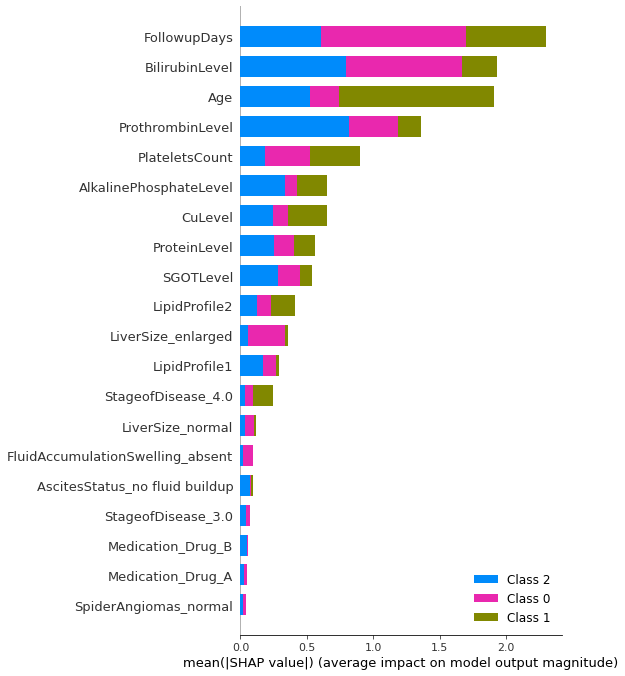

In [206]:
shap.summary_plot(shap_values, X_test_without_scaling, plot_type='bar', show=False)

We can see FollowupDays & BilirubinLevel comes out to be important features which impacts predictions

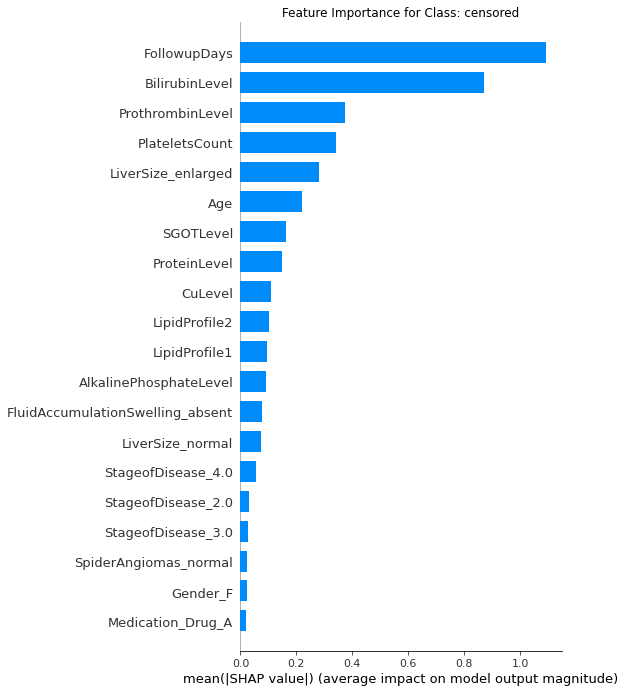

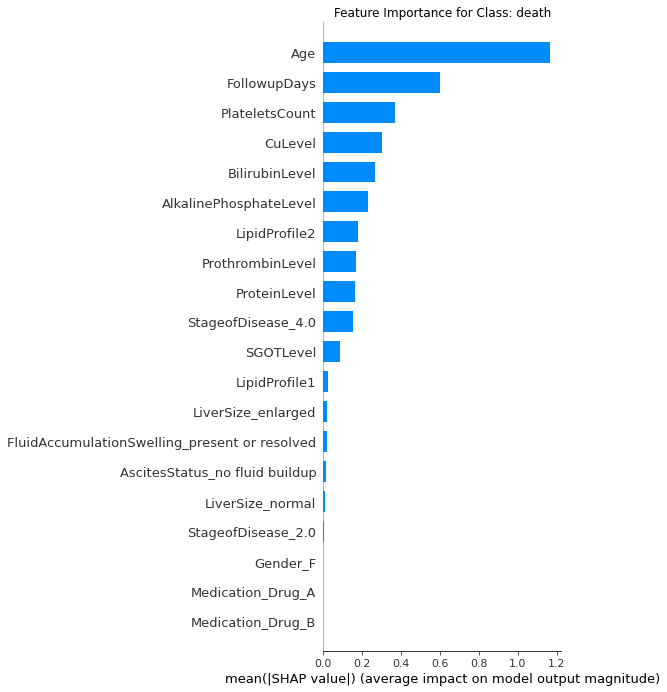

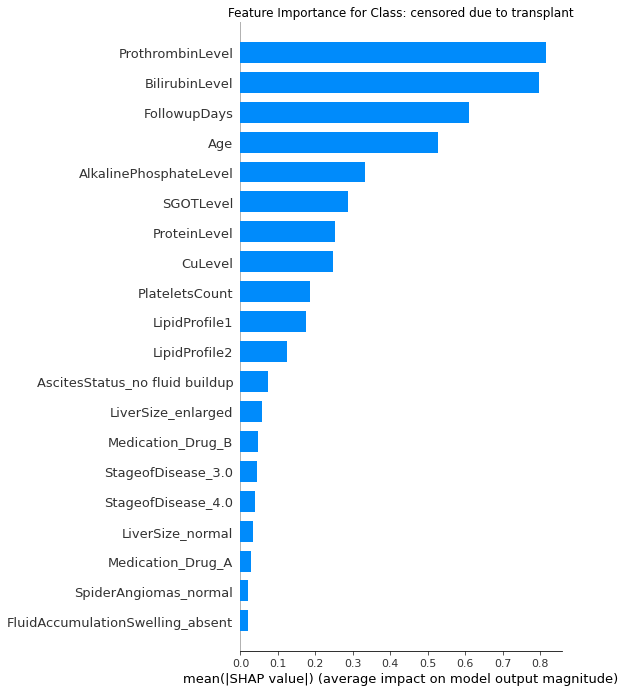

In [212]:
class_names = ['censored', 'death', 'censored due to transplant']

for i in range(len(class_names)):
    shap.summary_plot(shap_values[i], X_test_without_scaling, plot_type='bar', show=False)
    plt.title(f'Feature Importance for Class: {class_names[i]}')
    plt.show()

Above plot shows more granular view on how feature importance vary across different classes

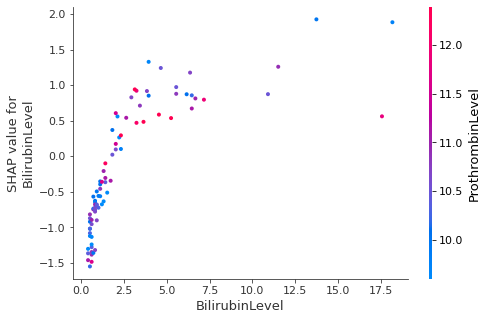

In [213]:
shap.dependence_plot('BilirubinLevel', shap_values[2], X_test_without_scaling)

Explanation of the Plot:
X-Axis: The value of the selected feature (BilirubinLevel).
Y-Axis: The SHAP value for that feature, indicating how much that feature contributed to the prediction for that observation.
Color: Represents the value of another feature (the one that interacts the most with the selected feature by default). In this case it is ProthrombinLevel

#### Future Improvements:

1) We can change on how we have imputed missing data for numerical variables, we can use KNNImputer.

2) Although, tree based models are robust to outliers, we can consider removing them. But because the data itself was very less ideally more data should be added.

3) We can try using different encoding techniques especially for categorical data. Scaling is not necessary when using tree based models.

4) We can further use techniques like cross validation, gridsearchcv in hope to find better results.

5) We can also try neural networks to see how they perform on tabular data, although tree based models perform at par when compared.